# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1.0. Exploratory Data Analysis

In [3]:
#Dataset upload from URL
url = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url)

## 1.1. Data Description

In [4]:
#Visualization of the first 05 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Number of rows and columns of the dataset
print("Number of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))

Number of rows: 21613
Number of columns: 21


In [13]:
#Number of attributes: this is without "id" and "date"
num_attributes = len(data.columns) - 2
print("The number of attribute is:", num_attributes)

The number of attribute is: 19


In [17]:
#Properties attributes
attributes = data.drop(['id','date'], axis=1)
attributes.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [18]:
#Variable types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
#Descriptive analysis
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


Notice that there is no statistical meaning when applying descriptive analysis for "id", "zipcode", "lat" and "long". 

In [20]:
#Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
print("Unique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
print("\nUnique values for floors:", np.sort(data['floors'].unique()))
print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
print("\nUnique values for view:", np.sort(data['view'].unique()))
print("\nUnique values for condition:", np.sort(data['condition'].unique()))
print("\nUnique values for grade:", np.sort(data['grade'].unique()))

Unique values for bedrooms: [ 0  1  2  3  4  5  6  7  8  9 10 11 33]

Unique values for bathrooms: [0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5
 7.75 8.  ]

Unique values for floors: [1.  1.5 2.  2.5 3.  3.5]

Unique values for waterfront: [0 1]

Unique values for view: [0 1 2 3 4]

Unique values for condition: [1 2 3 4 5]

Unique values for grade: [ 1  3  4  5  6  7  8  9 10 11 12 13]


While there are properties with 33 bedrooms, also are there with 0. The same happens with the number of bathrooms.              This would properly be classified as inconsistences, yet I choose to classify into different types of properties in            this analysis. 

The other attributes contain a large number of unique values, such as "id" - as it may be seen below. Thus, they were not considered in this analysis. 

In [21]:
print("Number of unique values for 'id':", data['id'].nunique())

Number of unique values for 'id': 21436


While the number of rows is 21613, the number of unique "id" is 21436. It means there are only 21436 properties. 

## 1.2. Data Cleaning

In [22]:
#Checking for missing values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
#Checking for duplicates in identification number (id)
ids = data['id']
data[ids.isin(ids[ids.duplicated()])].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
16814,7200179,20141016T000000,150000.00,2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
16815,7200179,20150424T000000,175000.00,2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
11434,109200390,20141020T000000,250000.00,3,1.75,1480,3900,1.00,0,0,...,7,1480,0,1980,0,98023,47.30,-122.37,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,20140627T000000,260000.00,2,1.00,700,4800,1.00,0,0,...,7,700,0,1922,0,98122,47.61,-122.30,1440,4800
15200,9834200305,20150210T000000,615000.00,3,1.00,1790,3876,1.50,0,0,...,7,1090,700,1904,0,98144,47.58,-122.29,1360,4080
15199,9834200305,20140716T000000,350000.00,3,1.00,1790,3876,1.50,0,0,...,7,1090,700,1904,0,98144,47.58,-122.29,1360,4080
1085,9834200885,20140717T000000,360000.00,4,2.50,2080,4080,1.00,0,0,...,7,1040,1040,1962,0,98144,47.57,-122.29,1340,4080


Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time. 

It is important to mention that the number of duplicates is different from the number of ids that are duplicates. Notice that the same id appears twice or more. Thus, the number of ids that are duplicate is: total number of rows - number of unique ids = 177.

## 1.3. Data Conversion

In [4]:
data['date'] =  pd.to_datetime(data['date'])

## 1.3. Outliers 

<AxesSubplot:ylabel='price'>

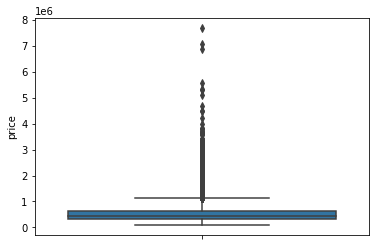

In [3]:
sns.boxplot(y='price',data=data)

In [6]:
data_clean = data.drop('date', axis=1)

In [7]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_clean))
print(z)

             id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      0.886146  0.866717  0.398737   1.447464     0.979835  0.228321   
1      0.637511  0.005688  0.398737   0.175607     0.533634  0.189885   
2      0.365444  0.980849  1.473959   1.447464     1.426254  0.123298   
3      0.727656  0.174090  0.676485   1.149449     0.130550  0.244014   
4      0.912881  0.081958  0.398737   0.149007     0.435422  0.169653   
...         ...       ...       ...        ...          ...       ...   
21608  1.500888  0.490545  0.398737   0.500221     0.598746  0.337424   
21609  0.702159  0.381588  0.676485   0.500221     0.250539  0.224386   
21610  1.062751  0.375865  1.473959   1.772078     1.154047  0.332137   
21611  1.491046  0.381588  0.398737   0.500221     0.522528  0.307076   
21612  1.062751  0.585882  1.473959   1.772078     1.154047  0.338752   

         floors  waterfront      view  condition     grade  sqft_above  \
0      0.915427    0.087173  0.305759   0.629187 

In [8]:
threshold = 3
print(np.where(z > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600], dtype=int64), array([14,  3,  4, ..., 12, 18, 11], dtype=int64))


In [12]:
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [13]:
print(data_clean < (Q1 - 1.5 * IQR)) |(data_clean > (Q3 + 1.5 * IQR))

          id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21608  False  False     False      False        False     False   False   
21609  False  False     False      False        False     False   False   
21610  False  False     False      False        False     False   False   
21611  False  False     False      False        False     False   False   
21612  False  False     False      False        False     False   False   

       waterfront   view  condition  grade  sqft_above  sqft_basement  \
0           False  False  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [14]:
data_clean = data_clean[(z < 3).all(axis=1)]